## **Data** Analysis of Sulpak.kz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import zscore
from scipy import stats
from patsy import dmatrices

# Processing Phone Data

In [ ]:
phone = pd.read_csv('sulpak_phones_data.csv')


phone.info()
phone.head()

phone['Brand'] = phone['name'].str.split(expand=True)[1]
phone['type'] = 'phone'
phone = phone.rename(columns={
    'phone_price': 'price',
    'phone_instock': 'instock',
    'phone_feedback': 'feedback'
})
phone.drop(columns='phone_name', inplace=True)

phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 74 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   name                                        792 non-null    object 
 1   phone_name                                  689 non-null    object 
 2   phone_price                                 792 non-null    object 
 3   phone_instock                               792 non-null    object 
 4   phone_feedback                              792 non-null    object 
 5   kod_tovara                                  792 non-null    object 
 6   Wireless_charging                           317 non-null    object 
 7   Battery_type                                776 non-null    object 
 8   Communication_standard                      791 non-null    object 
 9   Memory_card_slot                            787 non-null    object 
 10  NFC           

,name,price,instock,feedback,kod_tovara,Wireless_charging,Battery_type,Communication_standard,Memory_card_slot,NFC,...,Housing_material,System_user_interface,OS_version,AI_chat_assistant,Face_unlock,Reverse_charging,Fast_charging,warranty,Brand,type
0,Смартфон Apple iPhone 16 Pro 8/128GB Black Tit...,719 990 ₸,Есть в наличии,0 отзывов,Код товара: 625372,Да,Li-Ion (Литий-ионный),5G,отсутствует,Да,...,"Стекло, алюминий",IOS 18,IOS 18,Да,Да,Да,Да,12 мес.,Apple,phone
1,Смартфон Apple iPhone 16 Pro Max 8/512GB Deser...,1 039 990 ₸,Есть в наличии,0 отзывов,Код товара: 625387,Да,Li-Ion (Литий-ионный),5G,отсутствует,Да,...,"Стекло, алюминий",IOS 18,IOS 18,Да,Да,Да,Да,12 мес.,Apple,phone
2,Смартфон Apple iPhone 16 Pro Max 8/256GB Natur...,894 990 ₸,Есть в наличии,0 отзывов,Код товара: 625386,Да,Li-Ion (Литий-ионный),5G,отсутствует,Да,...,"Стекло, алюминий",IOS 18,IOS 18,Да,Да,Да,Да,12 мес.,Apple,phone
3,Смартфон Apple iPhone 16 Pro 8/256GB Natural T...,769 990 ₸,Есть в наличии,1 отзыв,Код товара: 625373,Да,Li-Ion (Литий-ионный),5G,отсутствует,Да,...,"Стекло, алюминий",IOS 18,IOS 18,Да,Да,Да,Да,12 мес.,Apple,phone
4,Смартфон Apple iPhone 16 Pro 8/256GB Desert Ti...,769 990 ₸,Есть в наличии,0 отзывов,Код товара: 625354,Да,Li-Ion (Литий-ионный),5G,отсутствует,Да,...,"Стекло, алюминий",IOS 18,IOS 18,Да,Да,Да,Да,12 мес.,Apple,phone


# Processing Laptop Data

In [ ]:
laptop = pd.read_csv('sulpak_laptop_data.csv')

laptop.info()
laptop.head()

laptop.drop(columns='laptop_name', inplace=True)
laptop = laptop.rename(columns={
    'laptop_price': 'price',
    'laptop_instock': 'instock',
    'laptop_feedback': 'feedback'
})
laptop['type'] = 'laptop'
laptop['Brand'] = laptop['name'].str.split(expand=True)[1]

laptop.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   name                                   308 non-null    object 
 1   laptop_name                            308 non-null    object 
 2   laptop_price                           198 non-null    object 
 3   laptop_instock                         198 non-null    object 
 4   laptop_feedback                        308 non-null    object 
 5   kod_tovara                             308 non-null    object 
 6   category                               308 non-null    object 
 7   CPU_manufacturer                       306 non-null    object 
 8   RAM                                    308 non-null    object 
 9   GPU                                    300 non-null    object 
 10  gb                                     302 non-null    object 
 11  OS_ver

,name,price,instock,feedback,kod_tovara,category,CPU_manufacturer,RAM,GPU,gb,...,Approximate_continuous_operation_time,Number_of_RAM_slots,Fingerprint_scanner,Equipment,Dimensions,Weight,Country,warranty,type,Brand
0,Ноутбук Acer Nitro V ANV15-51 Core i5 13420H 1...,389 990 ₸,На витрине,4 отзыва,Код товара: 615946,Для игр и продакшена,Intel® Core™ i5,16 GB,RTX 2050 4GB,SSD 512GB,...,6 ч,2.0,Нет,"Ноутбук Acer, кабель зарядный, аккумулятор, ин...","362,3х239,89х26,9 мм","2,1 кг",Китай,12 мес.,laptop,Acer
1,Ноутбук Thunderobot 911S Core D Core i5-12450H...,389 990 ₸,Есть в наличии,2 отзыва,Код товара: 619389,Для игр и продакшена,Intel® Core™ i5,16 GB,RTX 3050 4GB,SSD 512GB,...,"4,5 ч",2.0,Нет,"Ноутбук, зарядное устройтво, руководство польз...",25*361*241 мм,"2,48 кг",Китай,12 мес.,laptop,Thunderobot
2,Ноутбук Acer Aspire Lite AL15-31P Celeron N450...,129 990 ₸,Есть в наличии,0 отзывов,Код товара: 619553,Для работы и учебы,Intel® Celeron®,4 GB,INTEGRATED,SSD 128GB,...,6 ч,NaN,Нет,"Кабель зарядный, аккумулятор","362,9 x 237,5 x 18,9 мм","1,75 кг",Китай,12 мес.,laptop,Acer
3,Ноутбук Lenovo LOQ 3 Series 15IAX9 Core I5 124...,439 990 ₸,Есть в наличии,2 отзыва,Код товара: 619489,Для игр и продакшена,Intel® Core™ i5,16 GB,RTX 3050 6GB,SSD 512GB,...,6 ч,2.0,Нет,"Кабель зарядный, аккумулятор","359,86 x 258,7 x 21,9 мм","2,38 кг",Китай,12 мес.,laptop,Lenovo
4,Ноутбук Acer Nitro V 15 ANV15-41 Ryzen 5 7535H...,379 990 ₸,Есть в наличии,1 отзыв,Код товара: 619555,Для игр и продакшена,AMD® Ryzen™ 5,16 GB,RTX 2050 4GB,SSD 512GB,...,6 ч,2.0,Нет,"Кабель зарядный, аккумулятор","362,3 x 239,9 x 23,50 мм",2 кг,Китай,12 мес.,laptop,Acer


# Processing TV Data

In [ ]:
tv = pd.read_csv('sulpak_tv_data.csv')

tv.info()
tv.head()

tv = tv.drop(columns='name1')
tv['type'] = 'tv'
brands = ['Haier', 'ARG', 'LG', 'Samsung', 'Яндекс', 'Candy', 'Sony', 'Philips', 'Hisense', 'TCL']
tv['Brand'] = tv['name'].apply(
    lambda x: next((brand for brand in brands if brand in x), None)
)

tv.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 286 non-null    object
 1   name1                286 non-null    object
 2   price                268 non-null    object
 3   instock              268 non-null    object
 4   feedback             286 non-null    object
 5   kod_tovara           286 non-null    object
 6   display_diagonal     286 non-null    object
 7   screen_resolution    286 non-null    object
 8   CPU_manufacturer     286 non-null    object
 9   screen_refresh_rate  278 non-null    object
 10  Color                285 non-null    object
 11  USB_connector        286 non-null    object
 12  display_diagonal.1   286 non-null    object
 13  Processor_model      285 non-null    object
 14  Color.1              285 non-null    object
 15  Processor_model.1    285 non-null    object
 16  Equipmen

,name,price,instock,feedback,kod_tovara,display_diagonal,screen_resolution,CPU_manufacturer,screen_refresh_rate,Color,...,Processor_model,Color.1,Processor_model.1,Equipment,Country,Dimensions,Weight,warranty,type,Brand
0,OLED телевизор Haier 65 S9 Pro,899 990 ₸,Есть в наличии,8 отзывов,Код товара: 606873,"65″ -165,1 см",3840x2160 (4K UHD),OLED,120 Гц,Серый / черный,...,Android TV,Серый / черный,Android TV,"пульт ДУ, батарейки, руководство пользователя,...",Китай,1447x834x69 мм,"23,2 кг",12 мес.,tv,Haier
1,QLED телевизор Haier 55 S2 Pro,289 990 ₸,Есть в наличии,5 отзывов,Код товара: 621997,"55″ - 139,7см",3840x2160 (4K UHD),QLED,60 Гц,Черный,...,Android TV,Черный,Android TV,"Пульт ДУ, батарейки, руководство пользователя,...",Россия,1226 х 709 х 83 мм,"10,5 кг",12 мес.,tv,Haier
2,LED телевизор Haier 65 S2,299 990 ₸,Есть в наличии,1 отзыв,Код товара: 619401,"65″ -165,1 см",3840x2160 (4K UHD),LED,60 Гц,Черный,...,Android TV,Черный,Android TV,"Телевизор, пульт дистанционного управления, ру...",Россия,1450х842х84 мм,"16,3 кг",12 мес.,tv,Haier
3,OLED телевизор Haier 55 S9 Pro,599 990 ₸,Есть в наличии,2 отзыва,Код товара: 611889,"55″ - 139,7см",3840x2160 (4K UHD),OLED,120 Гц,Черный,...,Android TV,Черный,Android TV,"Пульт ДУ, батарейки, руководство пользователя,...",Китай,1226 х 710 х 69 мм,"17,6 кг",12 мес.,tv,Haier
4,LED телевизор Haier 75 S1,489 990 ₸,Есть в наличии,3 отзыва,Код товара: 606724,"75″ - 190,5 см",3840x2160 (4K UHD),LED,60 Гц,Черный,...,Android TV,Черный,Android TV,"Пульт ДУ, телевизор, руководство пользователя...",Китай,1673 x 969 x 76 мм,"22,7 кг",12 мес.,tv,Haier


# Combining All Datasets

In [ ]:
common_columns = phone.columns.intersection(laptop.columns).intersection(tv.columns)

phone_filtered = phone[common_columns]
laptop_filtered = laptop[common_columns]
tv_filtered = tv[common_columns]

res = pd.concat([phone_filtered, laptop_filtered, tv_filtered], ignore_index=True)

res.info()
res.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1386 non-null   object
 1   price                1258 non-null   object
 2   instock              1258 non-null   object
 3   feedback             1386 non-null   object
 4   kod_tovara           1386 non-null   object
 5   USB_connector        1369 non-null   object
 6   Processor_model      1383 non-null   object
 7   CPU_manufacturer     1377 non-null   object
 8   screen_refresh_rate  1306 non-null   object
 9   screen_resolution    1370 non-null   object
 10  display_diagonal     1373 non-null   object
 11  Color                1376 non-null   object
 12  Weight               1384 non-null   object
 13  Dimensions           1385 non-null   object
 14  Equipment            1386 non-null   object
 15  Country              1379 non-null   object
 16  warran

,name,price,instock,feedback,kod_tovara,USB_connector,Processor_model,CPU_manufacturer,screen_refresh_rate,screen_resolution,display_diagonal,Color,Weight,Dimensions,Equipment,Country,warranty,Brand,type
0,Смартфон Apple iPhone 16 Pro 8/128GB Black Tit...,719 990 ₸,Есть в наличии,0 отзывов,Код товара: 625372,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Черный,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
1,Смартфон Apple iPhone 16 Pro Max 8/512GB Deser...,1 039 990 ₸,Есть в наличии,0 отзывов,Код товара: 625387,Type-C,A18,Apple,120 Гц,1312х2848,"6,9″ - 17,52 см",Золотой,227 г,163 х 77.6 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
2,Смартфон Apple iPhone 16 Pro Max 8/256GB Natur...,894 990 ₸,Есть в наличии,0 отзывов,Код товара: 625386,Type-C,A18,Apple,120 Гц,1312х2848,"6,9″ - 17,52 см",Серый,227 г,163 х 77.6 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
3,Смартфон Apple iPhone 16 Pro 8/256GB Natural T...,769 990 ₸,Есть в наличии,1 отзыв,Код товара: 625373,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Серый,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
4,Смартфон Apple iPhone 16 Pro 8/256GB Desert Ti...,769 990 ₸,Есть в наличии,0 отзывов,Код товара: 625354,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Золотой,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone


# Cleaning the Combined Dataset

In [ ]:
missing_threshold = 0.5

res_cleaned = res.loc[:, res.isnull().mean() < missing_threshold]

essential_columns = ["price", "name"]
res_cleaned = res_cleaned.dropna(subset=essential_columns)

res_cleaned.columns = res_cleaned.columns.str.lower().str.replace(" ", "_")

res_cleaned['price'] = res_cleaned['price'].str.replace(r"[^\d.]", "", regex=True).astype(float)

print(res_cleaned['price'].describe())

res_cleaned.info()
res_cleaned.head()


count    1.258000e+03
mean     4.303649e+05
std      5.563843e+05
min      2.749500e+04
25%      1.599900e+05
50%      2.799900e+05
75%      5.672415e+05
max      1.399999e+07
Name: price, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1367
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1258 non-null   object 
 1   price                1258 non-null   float64
 2   instock              1258 non-null   object 
 3   feedback             1258 non-null   object 
 4   kod_tovara           1258 non-null   object 
 5   usb_connector        1241 non-null   object 
 6   processor_model      1255 non-null   object 
 7   cpu_manufacturer     1249 non-null   object 
 8   screen_refresh_rate  1178 non-null   object 
 9   screen_resolution    1242 non-null   object 
 10  display_diagonal     1247 non-null   object 
 11  color                1252 non-null   ob

,name,price,instock,feedback,kod_tovara,usb_connector,processor_model,cpu_manufacturer,screen_refresh_rate,screen_resolution,display_diagonal,color,weight,dimensions,equipment,country,warranty,brand,type
0,Смартфон Apple iPhone 16 Pro 8/128GB Black Tit...,719990.0,Есть в наличии,0 отзывов,Код товара: 625372,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Черный,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
1,Смартфон Apple iPhone 16 Pro Max 8/512GB Deser...,1039990.0,Есть в наличии,0 отзывов,Код товара: 625387,Type-C,A18,Apple,120 Гц,1312х2848,"6,9″ - 17,52 см",Золотой,227 г,163 х 77.6 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
2,Смартфон Apple iPhone 16 Pro Max 8/256GB Natur...,894990.0,Есть в наличии,0 отзывов,Код товара: 625386,Type-C,A18,Apple,120 Гц,1312х2848,"6,9″ - 17,52 см",Серый,227 г,163 х 77.6 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
3,Смартфон Apple iPhone 16 Pro 8/256GB Natural T...,769990.0,Есть в наличии,1 отзыв,Код товара: 625373,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Серый,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
4,Смартфон Apple iPhone 16 Pro 8/256GB Desert Ti...,769990.0,Есть в наличии,0 отзывов,Код товара: 625354,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Золотой,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone


# Saving Final Dataset

In [ ]:
res_cleaned.to_csv('sulpak_all_data.csv', index=False)
res_cleaned.head()

,name,price,instock,feedback,kod_tovara,usb_connector,processor_model,cpu_manufacturer,screen_refresh_rate,screen_resolution,display_diagonal,color,weight,dimensions,equipment,country,warranty,brand,type
0,Смартфон Apple iPhone 16 Pro 8/128GB Black Tit...,719990.0,Есть в наличии,0 отзывов,Код товара: 625372,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Черный,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
1,Смартфон Apple iPhone 16 Pro Max 8/512GB Deser...,1039990.0,Есть в наличии,0 отзывов,Код товара: 625387,Type-C,A18,Apple,120 Гц,1312х2848,"6,9″ - 17,52 см",Золотой,227 г,163 х 77.6 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
2,Смартфон Apple iPhone 16 Pro Max 8/256GB Natur...,894990.0,Есть в наличии,0 отзывов,Код товара: 625386,Type-C,A18,Apple,120 Гц,1312х2848,"6,9″ - 17,52 см",Серый,227 г,163 х 77.6 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
3,Смартфон Apple iPhone 16 Pro 8/256GB Natural T...,769990.0,Есть в наличии,1 отзыв,Код товара: 625373,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Серый,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone
4,Смартфон Apple iPhone 16 Pro 8/256GB Desert Ti...,769990.0,Есть в наличии,0 отзывов,Код товара: 625354,Type-C,A18,Apple,120 Гц,1200x2640,"6,3″ - 16 см",Золотой,199 г,149.6 х 71.5 х 8.25 мм,"iPhone, USB-C to USB-C кабель",Китай,12 мес.,Apple,phone


# Defining Helper Functions

In [ ]:
def extract_number_from_text(text):
    if isinstance(text, str):
        match = re.search(r"[\d,]+", text)
        if match:
            return float(match.group().replace(",", "."))
    return None

def parse_display_diagonal(diag_str):
    match_cm = re.search(r'(\d+[.,]?\d*)\s*см', str(diag_str))
    if match_cm:
        val_cm = float(match_cm.group(1).replace(',', '.'))
        return val_cm
    return None

def parse_feedback(feedback_str):
    numeric_part = re.sub(r'[^\d]', '', str(feedback_str))
    if numeric_part == '':
        return 0
    return int(numeric_part)

def parse_dimensions(dim_str):
    dim_str = str(dim_str).replace("х", "x").replace("×", "x").replace("*", "x").replace("X", 'x')
    match = re.search(r'(\d+[.,]?\d*)\s*x\s*(\d+[.,]?\d*)\s*x\s*(\d+[.,]?\d*)', dim_str)
    if match:
        height = float(match.group(1).replace(',', '.'))
        width = float(match.group(2).replace(',', '.'))
        length = float(match.group(3).replace(',', '.'))
        return height / 10, width / 10, length / 10
    return np.nan, np.nan, np.nan


# Applying Data Transformation

In [ ]:
res_cleaned["screen_refresh_rate"] = res_cleaned["screen_refresh_rate"].apply(lambda x: extract_number_from_text(str(x)))
res_cleaned["screen_resolution_width"] = res_cleaned["screen_resolution"].apply(lambda x: int(str(x).replace("х", "x").replace("×", "x").split('x')[0]) if isinstance(x, str) else None)
res_cleaned["screen_resolution_height"] = res_cleaned["screen_resolution"].apply(lambda x: extract_number_from_text(str(x).replace("х", "x").replace("×", "x").split('x')[1]) if isinstance(x, str) else None)

res_cleaned['feedback'] = res_cleaned['feedback'].apply(parse_feedback)
res_cleaned["display_diagonal"] = res_cleaned["display_diagonal"].apply(parse_display_diagonal)
res_cleaned["weight"] = res_cleaned["weight"].apply(lambda x: extract_number_from_text(str(x)) if isinstance(x, str) else None)
res_cleaned["warranty"] = res_cleaned["warranty"].apply(lambda x: int(extract_number_from_text(str(x))) if isinstance(x, str) else None)

res_cleaned["height"], res_cleaned["width"], res_cleaned["length"] = zip(*res_cleaned["dimensions"].apply(parse_dimensions))

res_cleaned['kod_tovara'] = res_cleaned['kod_tovara'].apply(lambda x: (str(x).split()[2]))
res_cleaned['kod_tovara'] = res_cleaned['kod_tovara'].astype(int)


# Handling Missing Values

In [ ]:
res_cleaned.loc[:, ['usb_connector', 'processor_model', 'cpu_manufacturer', 'screen_resolution', 'color', 'dimensions', 'country']] = res_cleaned[['usb_connector', 'processor_model', 'cpu_manufacturer', 'screen_resolution', 'color', 'dimensions', 'country']].fillna('Unknown')

nan_count_per_row = res_cleaned.isna().sum(axis=1)
res_cleaned = res_cleaned[nan_count_per_row < 6]

columns_to_fill = ['screen_refresh_rate', 'display_diagonal', 'weight', 'warranty', 'screen_resolution_width', 'screen_resolution_height', 'height', 'width', 'length']
for column in columns_to_fill:
    res_cleaned[column] = res_cleaned[column].fillna(res_cleaned[column].mean())


# Saving the Cleaned Dataset

In [ ]:
res_cleaned.info()
res_cleaned.to_csv('sulpak_cleaned_all_data.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1258 non-null   object 
 1   price                     1258 non-null   float64
 2   instock                   1258 non-null   object 
 3   feedback                  1258 non-null   int64  
 4   kod_tovara                1258 non-null   int64  
 5   usb_connector             1258 non-null   object 
 6   processor_model           1258 non-null   object 
 7   cpu_manufacturer          1258 non-null   object 
 8   screen_refresh_rate       1258 non-null   float64
 9   screen_resolution         1258 non-null   object 
 10  display_diagonal          1258 non-null   float64
 11  color                     1258 non-null   object 
 12  weight                    1258 non-null   float64
 13  dimensions                1258 non-null   object 
 14  equipment    

# Load and Overview the Dataset

In [ ]:
file_path = 'sulpak_cleaned_all_data.csv'
df = pd.read_csv(file_path)

print("=== DataFrame Info ===")
df.info()

print("\n=== First 5 Rows ===")
print(df.head())


=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1258 non-null   int64  
 1   name                      1258 non-null   object 
 2   price                     1258 non-null   float64
 3   instock                   1258 non-null   object 
 4   feedback                  1258 non-null   int64  
 5   kod_tovara                1258 non-null   int64  
 6   usb_connector             1258 non-null   object 
 7   processor_model           1258 non-null   object 
 8   cpu_manufacturer          1258 non-null   object 
 9   screen_refresh_rate       1258 non-null   float64
 10  screen_resolution         1258 non-null   object 
 11  display_diagonal          1258 non-null   float64
 12  color                     1258 non-null   object 
 13  weight                    1258 non-null 

# Descriptive Statistics Pandas and Missing Values

In [ ]:
print("\n=== Descriptive Statistics (Pandas) ===")
display(df.describe())

print("\n=== Missing Values by Columns ===")
missing_values = df.isnull().sum()
display(missing_values)



=== Descriptive Statistics (Pandas) ===


,Unnamed: 0,price,feedback,kod_tovara,screen_refresh_rate,display_diagonal,weight,warranty,screen_resolution_width,screen_resolution_height,height,width,length
count,1258.000000,1.258000e+03,1258.000000,1258.00000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,651.934022,4.303649e+05,1.275040,604685.04531,93.838710,48.850650,133.915135,12.121912,1871.349436,2133.624799,42.734340,24.609359,4.515974
std,396.526806,5.563843e+05,3.126965,47249.91846,30.339623,55.934007,126.253244,1.193441,1229.527216,568.093842,48.729255,30.852746,14.437062
min,0.000000,2.749500e+04,0.000000,73081.00000,50.000000,11.930000,0.226000,12.000000,720.000000,720.000000,0.038100,0.002100,0.026200
25%,314.250000,1.599900e+05,0.000000,611343.50000,60.000000,16.660000,15.050000,12.000000,1080.000000,1612.000000,16.080000,7.460000,0.788000
50%,628.500000,2.799900e+05,0.000000,617795.50000,93.838710,17.140000,182.500000,12.000000,1220.000000,2160.000000,16.440000,7.700000,0.840000
75%,942.750000,5.672415e+05,1.000000,622247.75000,120.000000,40.640000,198.000000,12.000000,2560.000000,2532.000000,35.986000,24.940000,2.570000
max,1367.000000,1.399999e+07,33.000000,628529.00000,240.000000,248.920000,1510.000000,24.000000,7680.000000,4320.000000,219.100000,243.700000,334.400000



=== Missing Values by Columns ===


,0
Unnamed: 0,0
name,0
price,0
instock,0
feedback,0
kod_tovara,0
usb_connector,0
processor_model,0
cpu_manufacturer,0
screen_refresh_rate,0


# Descriptive Statistics with NumPy

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\n=== Descriptive Stats (NumPy) ===")
for col in numeric_cols:
    col_data = df[col].dropna()
    mean_val = np.mean(col_data)
    median_val = np.median(col_data)
    std_val = np.std(col_data, ddof=1)
    print(f"Column: {col}")
    print(f" - Mean:   {mean_val:.2f}")
    print(f" - Median: {median_val:.2f}")
    print(f" - Std:    {std_val:.2f}")
    print("-" * 30)


=== Descriptive Stats (NumPy) ===
Column: Unnamed: 0
 - Mean:   651.93
 - Median: 628.50
 - Std:    396.53
------------------------------
Column: price
 - Mean:   430364.91
 - Median: 279990.00
 - Std:    556384.33
------------------------------
Column: feedback
 - Mean:   1.28
 - Median: 0.00
 - Std:    3.13
------------------------------
Column: kod_tovara
 - Mean:   604685.05
 - Median: 617795.50
 - Std:    47249.92
------------------------------
Column: screen_refresh_rate
 - Mean:   93.84
 - Median: 93.84
 - Std:    30.34
------------------------------
Column: display_diagonal
 - Mean:   48.85
 - Median: 17.14
 - Std:    55.93
------------------------------
Column: weight
 - Mean:   133.92
 - Median: 182.50
 - Std:    126.25
------------------------------
Column: warranty
 - Mean:   12.12
 - Median: 12.00
 - Std:    1.19
------------------------------
Column: screen_resolution_width
 - Mean:   1871.35
 - Median: 1220.00
 - Std:    1229.53
------------------------------
Column: sc

# Central Tendencies and Measures of Dispersion

In [ ]:
print("\n=== Measures of Central Tendency ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns

mean_values = df[numeric_cols].mean()
print("Mean:\n", mean_values)

median_values = df[numeric_cols].median()
print("\nMedian:\n", median_values)

mode_values = df[numeric_cols].mode(numeric_only=True).iloc[0]
print("\nMode (first row if multiple modes exist):\n", mode_values)

print("\n=== Measures of Dispersion ===")
var_values = df[numeric_cols].var()
std_values = df[numeric_cols].std()

print("Variance:\n", var_values)
print("\nStandard Deviation:\n", std_values)

print("\n=== Skewness ===")
skew_values = df[numeric_cols].skew()
print(skew_values)

print("\n=== Kurtosis ===")
kurt_values = df[numeric_cols].kurt()
print(kurt_values)



=== Measures of Central Tendency ===
Mean:
 Unnamed: 0                     651.934022
price                       430364.912560
feedback                         1.275040
kod_tovara                  604685.045310
screen_refresh_rate             93.838710
display_diagonal                48.850650
weight                         133.915135
warranty                        12.121912
screen_resolution_width       1871.349436
screen_resolution_height      2133.624799
height                          42.734340
width                           24.609359
length                           4.515974
dtype: float64

Median:
 Unnamed: 0                     628.50000
price                       279990.00000
feedback                         0.00000
kod_tovara                  617795.50000
screen_refresh_rate             93.83871
display_diagonal                17.14000
weight                         182.50000
warranty                        12.00000
screen_resolution_width       1220.00000
screen_resoluti

# Visualizing Distributions

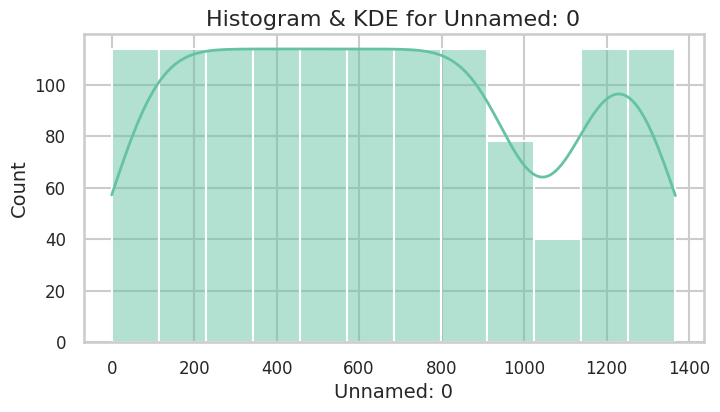

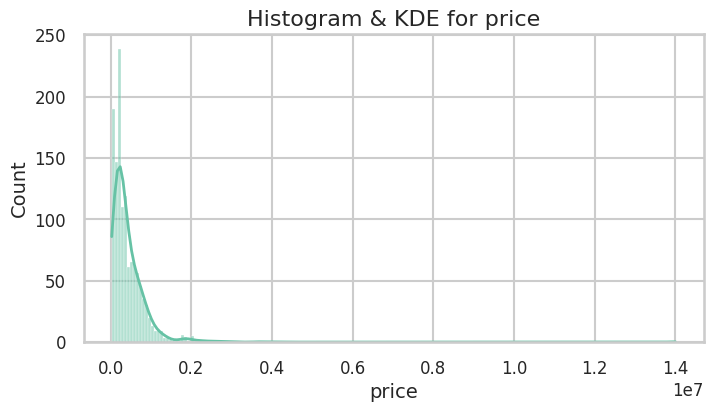

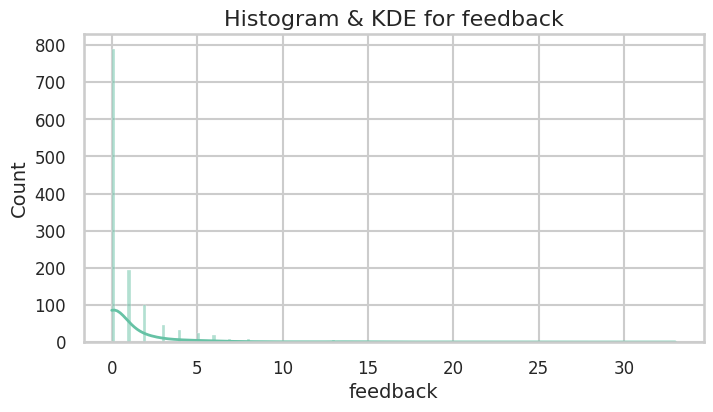

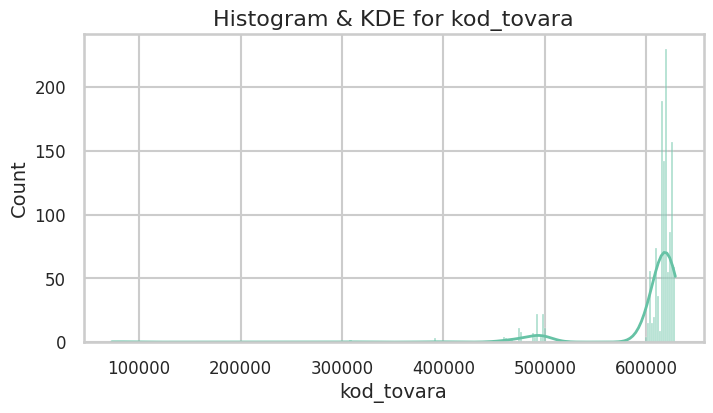

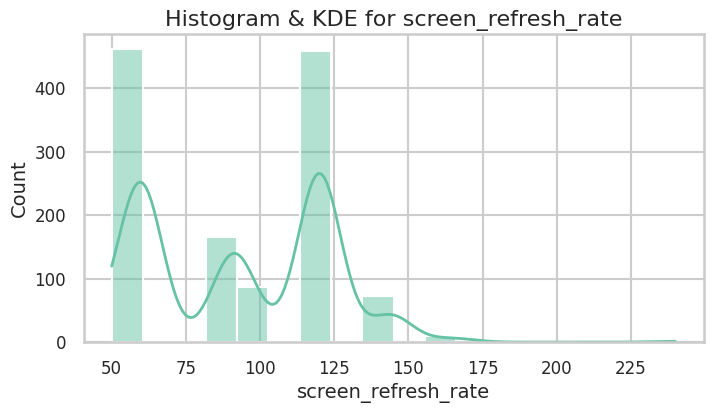

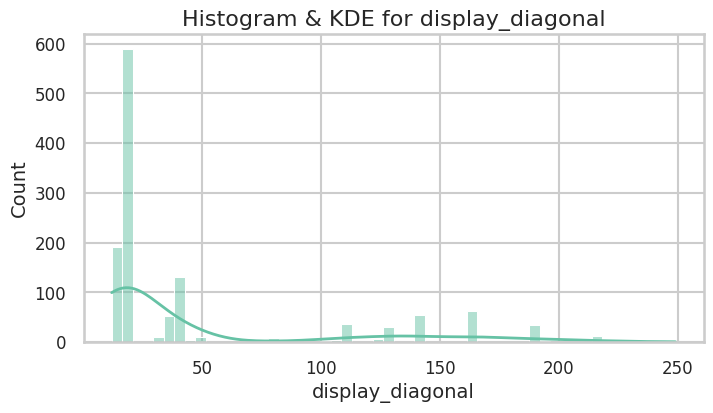

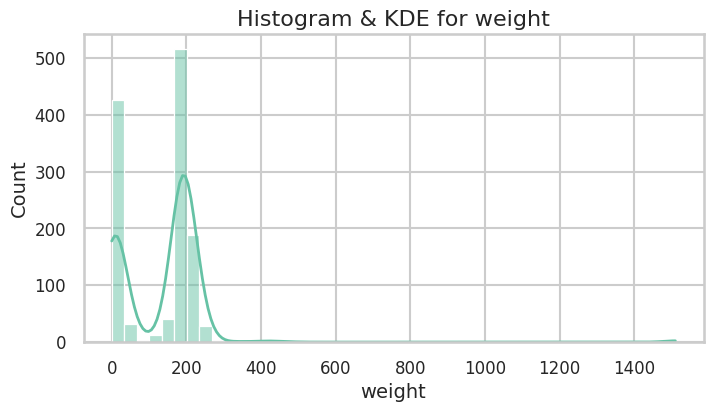

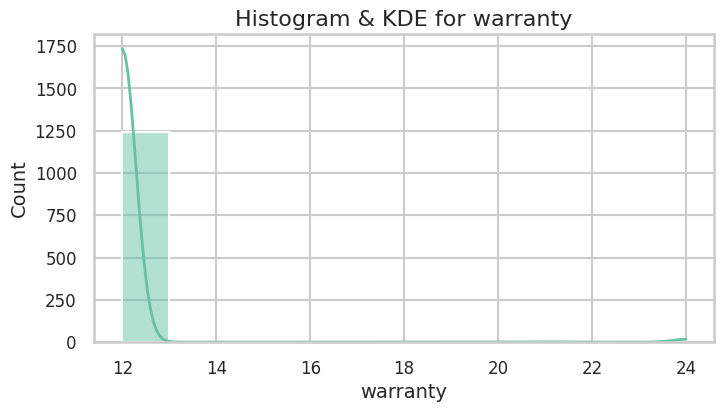

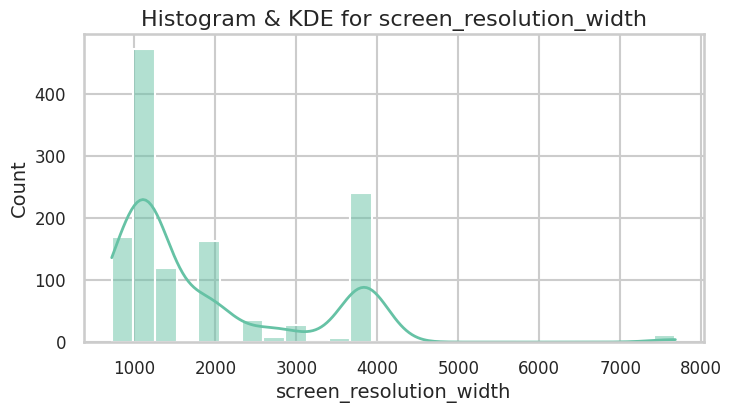

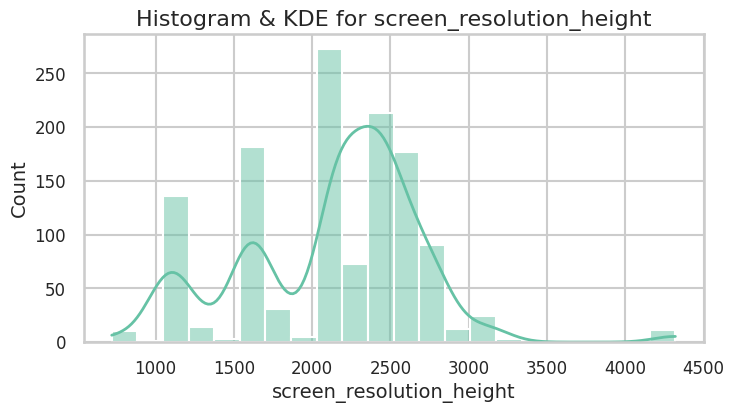

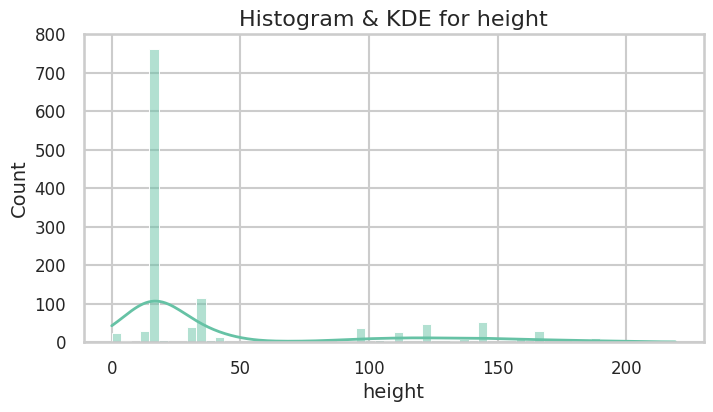

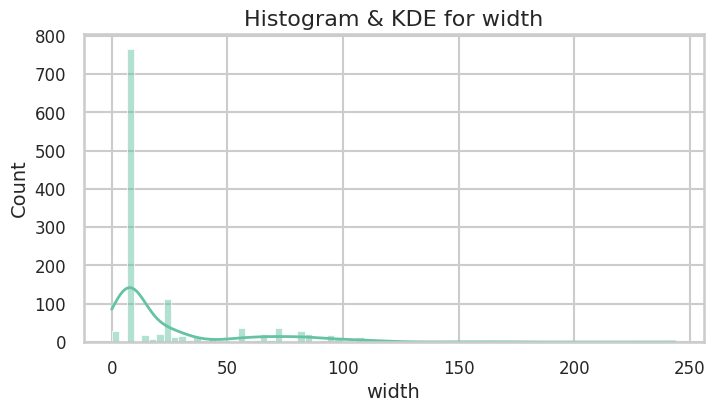

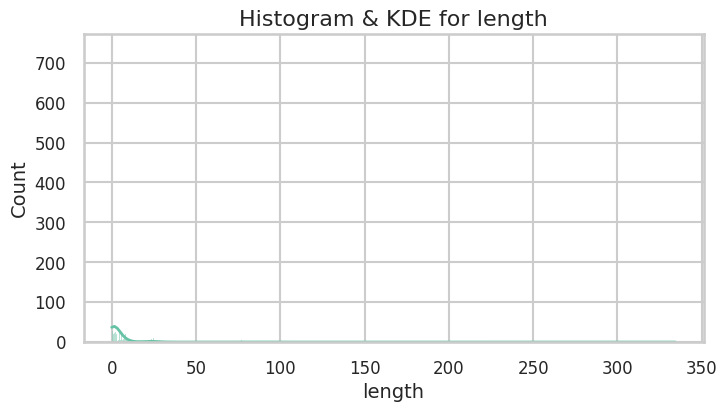

<Figure size 1000x600 with 0 Axes>

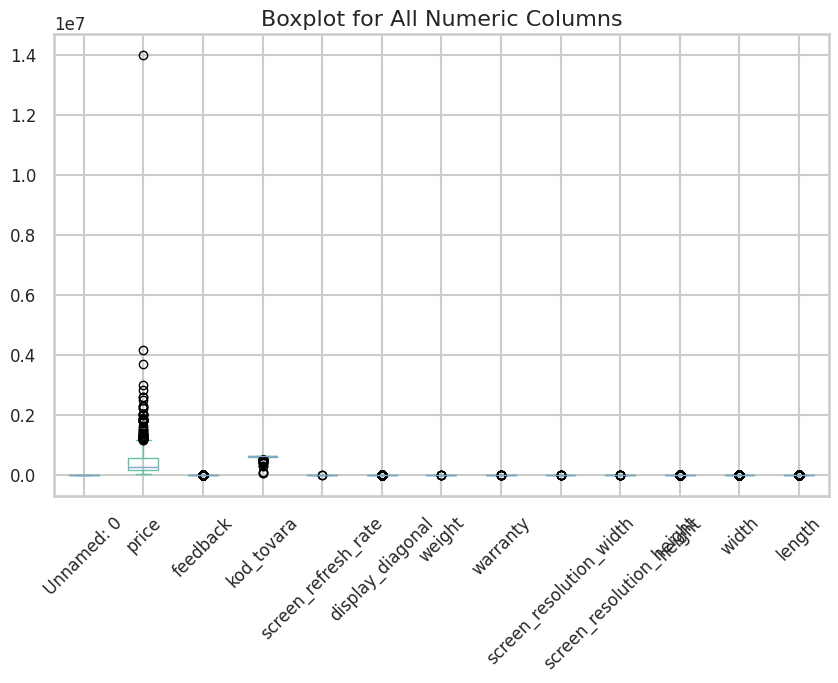

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Histogram & KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

plt.figure(figsize=(10, 6))
df[numeric_cols].plot(kind='box', subplots=False, figsize=(10, 6))
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()


# Identifying Outliers, Missing Values, and Unusual Patterns

In [ ]:
print("=== Missing Values Overview ===")
missing_values = df.isnull().sum()
print(missing_values)

print("\n=== Outliers Detection ===")
z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
outliers_indices = np.where(z_scores > 3)
print("Number of outlier rows found via Z-score:", len(np.unique(outliers_indices[0])))

if len(np.unique(outliers_indices[0])) > 0:
    outlier_rows = df.iloc[np.unique(outliers_indices[0])]
    print("Example outlier rows:")
    display(outlier_rows.head())

duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    print("Examples of duplicated rows:")
    display(duplicate_rows.head())

cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    print(f"\nCategorical Column '{col}' unique values:")
    print(df[col].value_counts())


=== Missing Values Overview ===
Unnamed: 0                  0
name                        0
price                       0
instock                     0
feedback                    0
kod_tovara                  0
usb_connector               0
processor_model             0
cpu_manufacturer            0
screen_refresh_rate         0
screen_resolution           0
display_diagonal            0
color                       0
weight                      0
dimensions                  0
equipment                   0
country                     0
warranty                    0
brand                       0
type                        0
screen_resolution_width     0
screen_resolution_height    0
height                      0
width                       0
length                      0
dtype: int64

=== Outliers Detection ===
Number of outlier rows found via Z-score: 119
Example outlier rows:


,Unnamed: 0,name,price,instock,feedback,kod_tovara,usb_connector,processor_model,cpu_manufacturer,screen_refresh_rate,...,equipment,country,warranty,brand,type,screen_resolution_width,screen_resolution_height,height,width,length
48,48,Смартфон Apple iPhone 13 4/128GB Midnight,299990.0,Есть в наличии,28,492616,Lightning,A15 Bionic,Apple,60.0,...,"Смартфон, кабель USB-Lightning, ключ для лотка...",Китай,12.0,Apple,phone,1170.0,2532.0,14.67,7.15,0.765
58,58,Смартфон Apple iPhone 14 Pro 6/256GB Deep Purple,398993.0,"В наличии, уценка",14,602531,Lightning,A16 Bionic,Apple,120.0,...,"Смартфон, кабель USB Type-C - Lightning, докум...",Китай,12.0,Apple,phone,1179.0,2556.0,14.75,7.15,0.785
69,69,Смартфон HUAWEI nova 12i 8/256GB Black,89890.0,Есть в наличии,15,618174,Type-C,Snapdragon 680,Qualcomm,90.0,...,"Смартфон, адаптер USB, кабель USB Type-C, устр...",Китай,12.0,HUAWEI,phone,1080.0,2388.0,16.33,7.47,0.840
78,78,Смартфон Samsung Galaxy S23 Ultra 5G 12/256GB ...,328993.0,"В наличии, уценка",18,608481,Type-C,Snapdragon 8 Gen 2 Mobile Platform for Galaxy,Qualcomm,120.0,...,"Смартфон, инструкция, гарантийный талон, кабел...",Вьетнам,12.0,Samsung,phone,1440.0,3088.0,16.34,7.81,0.890
125,125,Смартфон Apple iPhone 11 4/128GB Black Slim Box,269990.0,Есть в наличии,19,476069,Lightning,A13 Bionic,Apple,60.0,...,"Смартфон, кабель USB Type-C - Lighting, скрепк...",Китай,12.0,Apple,phone,828.0,1792.0,15.09,7.57,0.830



Number of Duplicate Rows: 0

Categorical Column 'name' unique values:
name
Смартфон Tecno POVA 5 Pro 5G 8/256GB Silver Fantasy          2
Смартфон OPPO A54 4/128GB Crystal Black                      2
Смартфон Tecno POVA 5 8/128GB Amber Gold                     2
LED телевизор ARG A65U1C1                                    2
LED телевизор TCL 65P735                                     2
                                                            ..
Смартфон Apple iPhone 14 Pro 6/256GB Silver                  1
Смартфон Apple iPhone 12 64 GB Purple Refurbished GRADE C    1
Смартфон HUAWEI nova 12s 8/256GB Blue                        1
Смартфон Apple iPhone 13 4/256GB Pink                        1
LED телевизор Samsung UE75MU8000UXCE                         1
Name: count, Length: 1249, dtype: int64

Categorical Column 'instock' unique values:
instock
Есть в наличии       762
На витрине           337
В наличии, уценка    155
Под заказ              4
Name: count, dtype: int64

Categorical

# Complex Grouping & Aggregation

In [ ]:
print("=== 1) Complex Grouping & Aggregation ===")

grouped = df.groupby(['brand', 'type']).agg(
    count_items=('price', 'count'),
    avg_price=('price', 'mean'),
    max_feedback=('feedback', 'max'),
    avg_warranty=('warranty', 'mean')
).reset_index()

print("\n>>> Aggregated by (brand, type):")
display(grouped)

grouped['total_in_type'] = grouped.groupby('type')['count_items'].transform('sum')
grouped['share_in_type_%'] = 100.0 * grouped['count_items'] / grouped['total_in_type']

print("\n>>> Adding share_in_type_% (brand's share in the category):")
display(grouped)


=== 1) Complex Grouping & Aggregation ===

>>> Aggregated by (brand, type):


,brand,type,count_items,avg_price,max_feedback,avg_warranty
0,ARG,tv,23,229425.434783,11,12.000000
1,ASUS,laptop,7,562847.142857,0,12.000000
2,Acer,laptop,34,327096.470588,14,12.000000
3,Apple,laptop,45,978479.022222,25,12.000000
4,Apple,phone,238,536098.638655,28,12.000000
5,Asus,laptop,45,497457.022222,3,12.266667
6,Candy,tv,5,166990.000000,1,12.000000
7,HONOR,laptop,2,349990.000000,0,12.000000
8,HP,laptop,9,284212.444444,5,12.000000
9,HUAWEI,laptop,13,448282.461538,7,17.538462



>>> Adding share_in_type_% (brand's share in the category):


,brand,type,count_items,avg_price,max_feedback,avg_warranty,total_in_type,share_in_type_%
0,ARG,tv,23,229425.434783,11,12.000000,268,8.582090
1,ASUS,laptop,7,562847.142857,0,12.000000,198,3.535354
2,Acer,laptop,34,327096.470588,14,12.000000,198,17.171717
3,Apple,laptop,45,978479.022222,25,12.000000,198,22.727273
4,Apple,phone,238,536098.638655,28,12.000000,792,30.050505
5,Asus,laptop,45,497457.022222,3,12.266667,198,22.727273
6,Candy,tv,5,166990.000000,1,12.000000,268,1.865672
7,HONOR,laptop,2,349990.000000,0,12.000000,198,1.010101
8,HP,laptop,9,284212.444444,5,12.000000,198,4.545455
9,HUAWEI,laptop,13,448282.461538,7,17.538462,198,6.565657


# Data Aggregation & Group Operations

In [ ]:
print("\n=== 2) Additional Aggregation to Uncover Meaningful Trends ===")

type_stats = df.groupby('type').agg(
    mean_price=('price', 'mean'),
    total_feedback=('feedback', 'sum'),
    mean_warranty=('warranty', 'mean'),
    item_count=('brand', 'count')
).reset_index()

print("\n>>> Aggregated stats by type:")
display(type_stats)





=== 2) Additional Aggregation to Uncover Meaningful Trends ===

>>> Aggregated stats by type:


,type,mean_price,total_feedback,mean_warranty,item_count
0,laptop,539453.757576,278,12.484848,198
1,phone,307889.321970,976,12.061068,792
2,tv,711712.212687,350,12.033582,268


# Pivot Tables for Summarized Data

In [ ]:
print("\n=== 3) Pivot Tables to Present Summarized Data Effectively ===")

pivot_price = pd.pivot_table(
    data=df,
    values='price',
    index='brand',
    columns='type',
    aggfunc='mean',
    fill_value=0
)
print("\n>>> Pivot Table: Average Price by (brand × type):")
display(pivot_price)

pivot_feedback = pd.pivot_table(
    data=df,
    values='feedback',
    index='brand',
    columns='type',
    aggfunc='sum',
    fill_value=0
)
print("\n>>> Pivot Table: Total Feedback by (brand × type):")
display(pivot_feedback)



=== 3) Pivot Tables to Present Summarized Data Effectively ===

>>> Pivot Table: Average Price by (brand × type):


type,laptop,phone,tv
brand,,,
ARG,0.000000,0.000000,229425.434783
ASUS,562847.142857,0.000000,0.000000
Acer,327096.470588,0.000000,0.000000
Apple,978479.022222,536098.638655,0.000000
Asus,497457.022222,0.000000,0.000000
Candy,0.000000,0.000000,166990.000000
HONOR,349990.000000,0.000000,0.000000
HP,284212.444444,0.000000,0.000000
HUAWEI,448282.461538,184637.157895,0.000000



>>> Pivot Table: Total Feedback by (brand × type):


type,laptop,phone,tv
brand,,,
ARG,0,0,48
ASUS,0,0,0
Acer,64,0,0
Apple,104,291,0
Asus,18,0,0
Candy,0,0,2
HONOR,0,0,0
HP,5,0,0
HUAWEI,24,195,0


# Prepare Data using Patsy

In [ ]:
from patsy import dmatrices

formula = "price ~ C(brand) + C(type) + display_diagonal"

y, X = dmatrices(formula, data=df, return_type='dataframe')

print("y.shape:", y.shape)
print("X.shape:", X.shape)

X.head()


y.shape: (1258, 1)
X.shape: (1258, 41)


,Intercept,C(brand)[T.ASUS],C(brand)[T.Acer],C(brand)[T.Apple],C(brand)[T.Asus],C(brand)[T.Candy],C(brand)[T.HONOR],C(brand)[T.HP],C(brand)[T.HUAWEI],C(brand)[T.Haier],...,C(brand)[T.VIVO],C(brand)[T.Vivo],C(brand)[T.Xiaomi],C(brand)[T.ZTE],C(brand)[T.Аcer],C(brand)[T.ОРРО],C(brand)[T.телефон],C(type)[T.phone],C(type)[T.tv],display_diagonal
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.00
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.52
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.52
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.00
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.00


# Linear Regression with Statsmodels

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     17.57
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.67e-93
Time:                        15:23:19   Log-Likelihood:                -18140.
No. Observations:                1258   AIC:                         3.636e+04
Df Residuals:                    1217   BIC:                         3.657e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

# Preprocessing Data for Scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df.drop(columns='Unnamed: 0', inplace=True)
qq = pd.get_dummies(df)


X = qq.drop(['price'], axis=1)
y = qq['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression with Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R^2: {r2_score(y_test, y_pred_lr)}")


MAE: 105462.87300327334
MSE: 23225533770.946606
R^2: 0.7828981619055899


# Logistic Regression for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y_class = (y > y.median()).astype(int)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_class_scaled, y_train_class)

y_pred_log_reg = log_reg_model.predict(X_test_class_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_log_reg))


Logistic Regression Accuracy: 0.9166666666666666


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R^2: {r2_score(y_test, y_pred_dt)}")


MAE: 80501.1507936508
MSE: 26494438619.095238
R^2: 0.7523419104072256


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2: {r2_score(y_test, y_pred_rf)}")


Random Forest Regression Metrics:
MAE: 62878.6105952381
MSE: 10170141376.495358
R^2: 0.9049340950226452


# Hyperparameter Optimization with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("R² Score (Best Model):", r2_best)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (Best Model): 17454122270.488926
R² Score (Best Model): 0.8368467194503025


# K-Nearest Neighbors (KNN) Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print(f"MAE: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"R^2: {r2_score(y_test, y_pred_knn)}")


MAE: 146928.0865079365
MSE: 54577144146.007454
R^2: 0.4898374164875493


# Compare Models

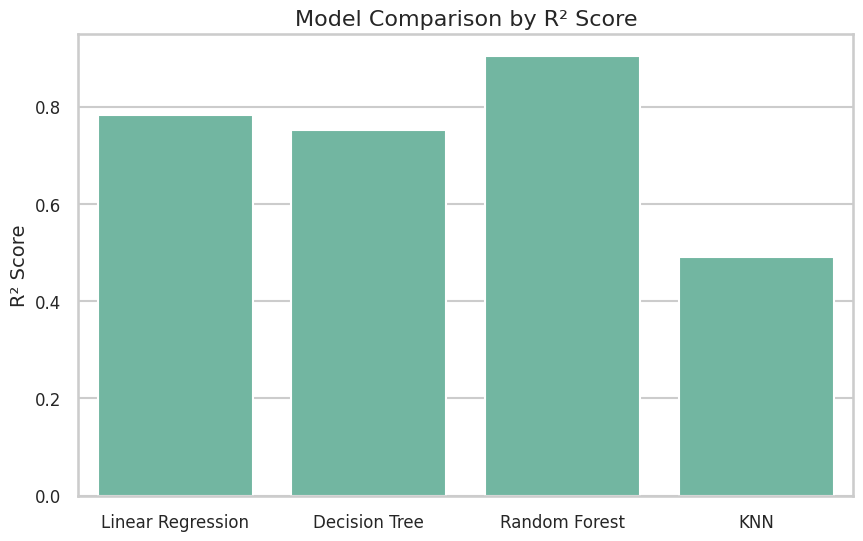

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_knn)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('Model Comparison by R² Score')
plt.ylabel('R² Score')
plt.show()


# SGD Regression

In [ ]:
from sklearn.linear_model import SGDRegressor

X = df[['screen_refresh_rate', 'screen_resolution_width', 'screen_resolution_height', 'height', 'width', 'length']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 87252064915.53572


# Customizing Style

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
!pip install squarify
import squarify

sns.set_theme(style="whitegrid", context="talk", palette="Set2")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'lines.linewidth': 2,
    'lines.markersize': 6
    })

# Top 5 Brands Price Distribution

<ipython-input-163-c8a740d88d02>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




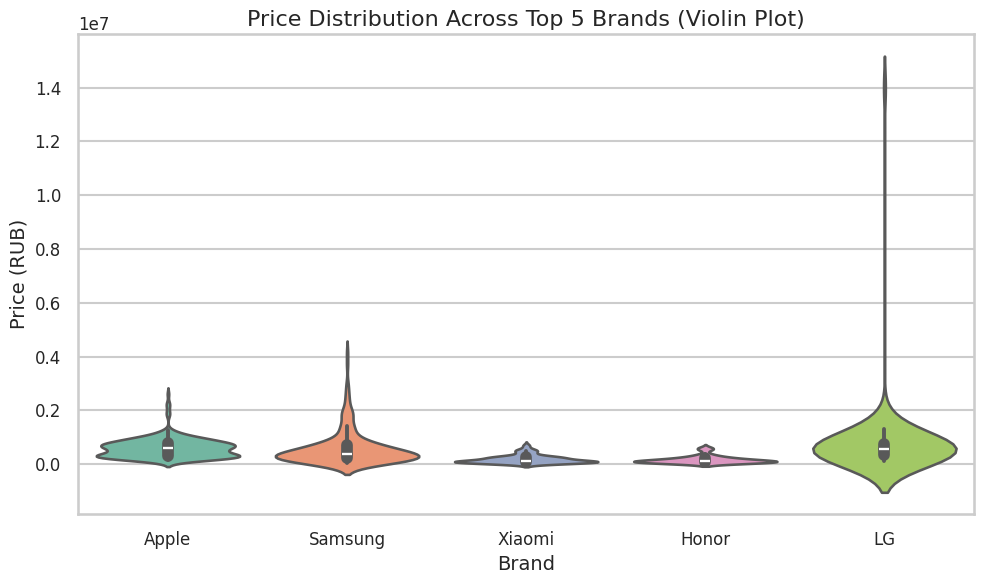

In [ ]:
top_brands = df['brand'].value_counts().index[:5]
df_top_brands = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_top_brands,
    x='brand',
    y='price',
    palette='Set2'
)
plt.title("Price Distribution Across Top 5 Brands (Violin Plot)")
plt.xlabel("Brand")
plt.ylabel("Price (RUB)")
plt.tight_layout()
plt.show()


# Correlation Matrix

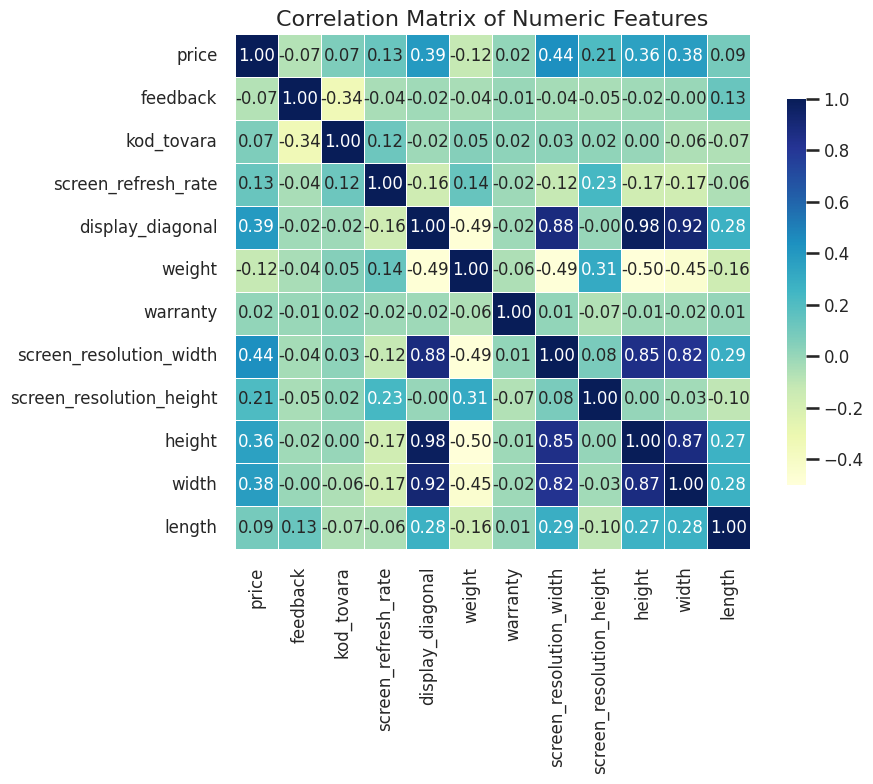

In [ ]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=.5,
    square=True,
    cbar_kws={"shrink": .75}
)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Treemap Visualization

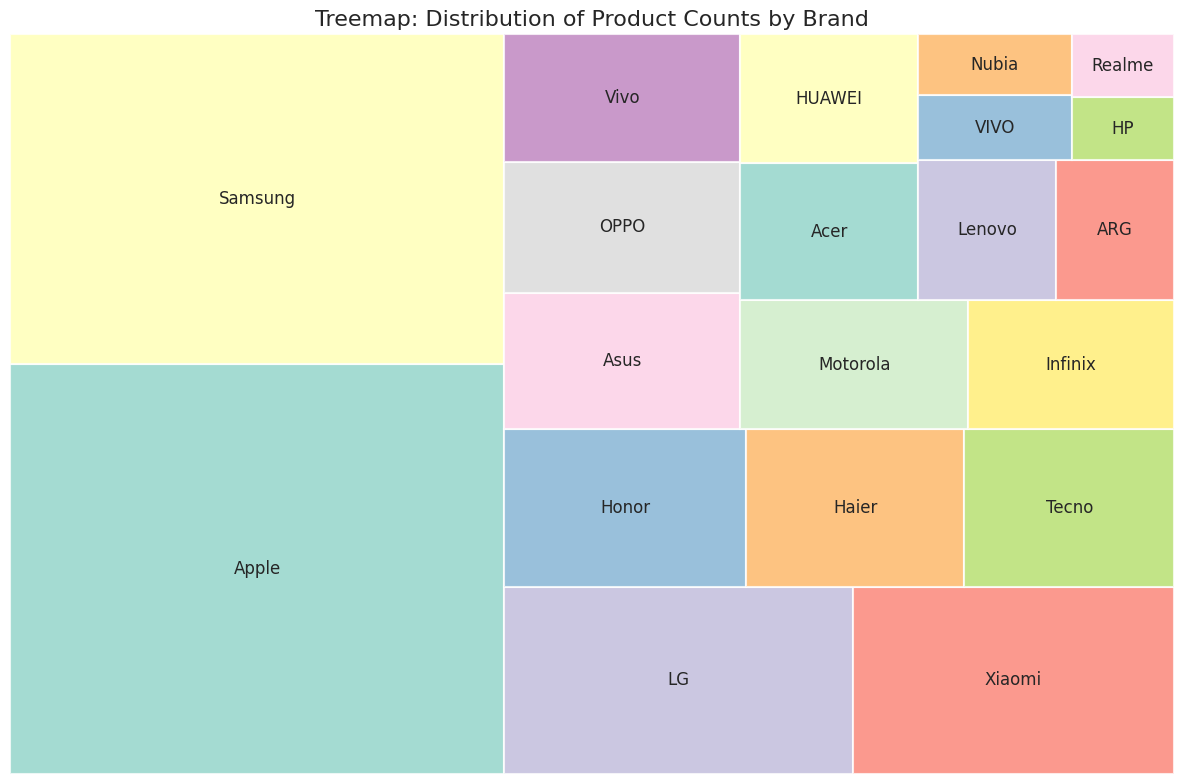

In [ ]:
plt.figure(figsize=(12, 8))
brand_counts = df['brand'].value_counts().reset_index().head(20)
brand_counts.columns = ['brand', 'count']

squarify.plot(
    sizes=brand_counts['count'],
    label=brand_counts['brand'],
    alpha=0.8,
    color=sns.color_palette('Set3', n_colors=len(brand_counts))
)
plt.axis('off')
plt.title("Treemap: Distribution of Product Counts by Brand")
plt.tight_layout()
plt.show()


# FacetGrid Bar Plot

<ipython-input-166-ba3e8404956f>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-166-ba3e8404956f>:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-166-ba3e8404956f>:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-166-ba3e8404956f>:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



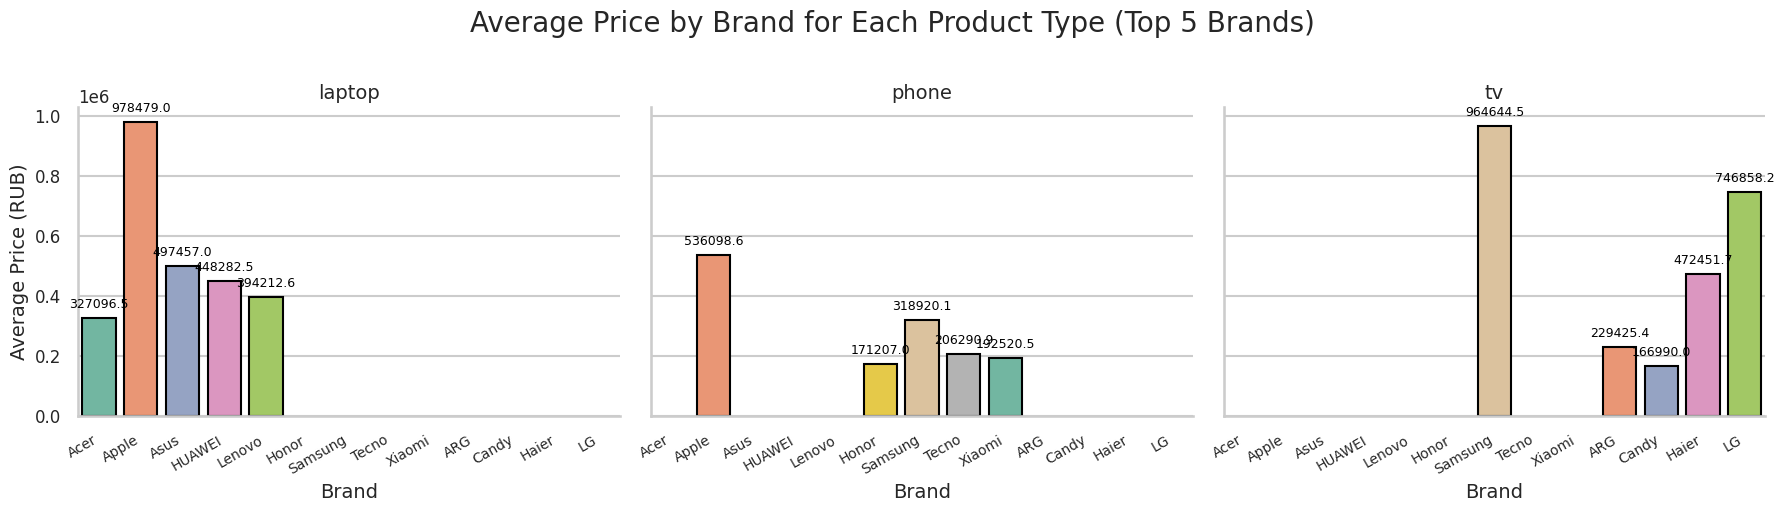

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_brands_per_type = (
    df
    .groupby(['type', 'brand'])
    .size()
    .reset_index(name='count')
    .sort_values(['type', 'count'], ascending=[True, False])
)
top_brands_per_type = top_brands_per_type.groupby('type').head(5)

df_top5 = pd.merge(
    df,
    top_brands_per_type[['type', 'brand']],
    on=['type', 'brand'],
    how='inner'
)

df_cat_agg = (
    df_top5
    .groupby(['type', 'brand'], as_index=False)['price']
    .mean()
)

g = sns.catplot(
    data=df_cat_agg,
    x='brand',
    y='price',
    col='type',
    kind='bar',
    height=5,
    aspect=1.2,
    palette='Set2',
    edgecolor='black'
)

g.fig.suptitle("Average Price by Brand for Each Product Type (Top 5 Brands)", y=1.02, fontsize=20)
g.set_axis_labels("Brand", "Average Price (RUB)")
g.set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.subplots_adjust(top=0.9)

plt.tight_layout()
plt.show()


# Dual Axis Plot

<ipython-input-167-322586aef06d>:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



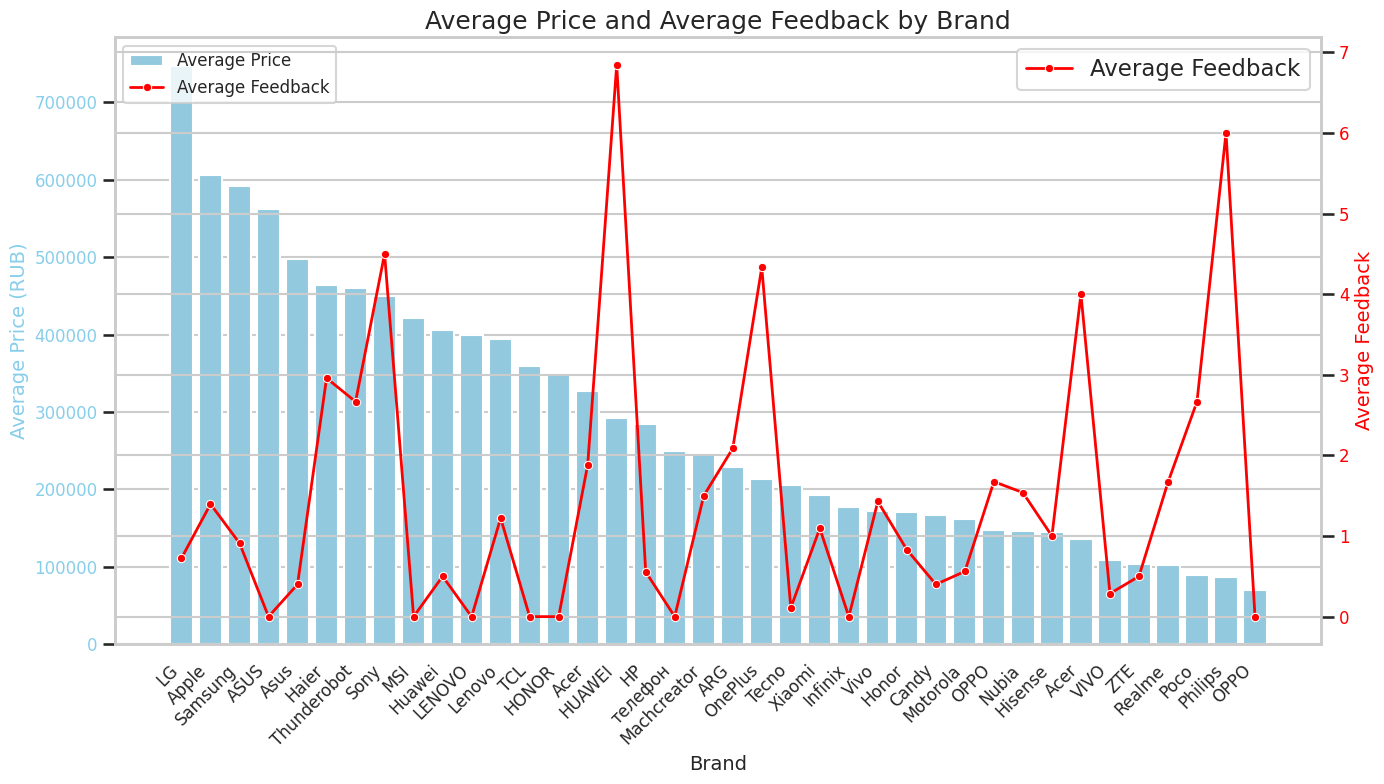

In [ ]:
df_avg = df.groupby('brand').agg(
    average_price=('price', 'mean'),
    average_feedback=('feedback', 'mean')
).reset_index()

df_avg = df_avg.sort_values('average_price', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x='brand', y='average_price', data=df_avg, ax=ax1, color='skyblue', label='Average Price')
ax1.set_xlabel('Brand', fontsize=14)
ax1.set_ylabel('Average Price (RUB)', fontsize=14, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()

sns.lineplot(x='brand', y='average_feedback', data=df_avg, ax=ax2, color='red', marker='o', label='Average Feedback')
ax2.set_ylabel('Average Feedback', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

plt.title('Average Price and Average Feedback by Brand', fontsize=18)

plt.tight_layout()

plt.show()


# Sunburst Chart

In [ ]:
import plotly.express as px

sunburst_data = df.groupby(['brand', 'type']).size().reset_index(name='count')

fig = px.sunburst(
    sunburst_data,
    path=['brand', 'type'],
    values='count',
    color='count',
    color_continuous_scale='RdBu',
    title='Sunburst Chart: Distribution of Products by Brands and Types'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


# Parallel Coordinates Plot

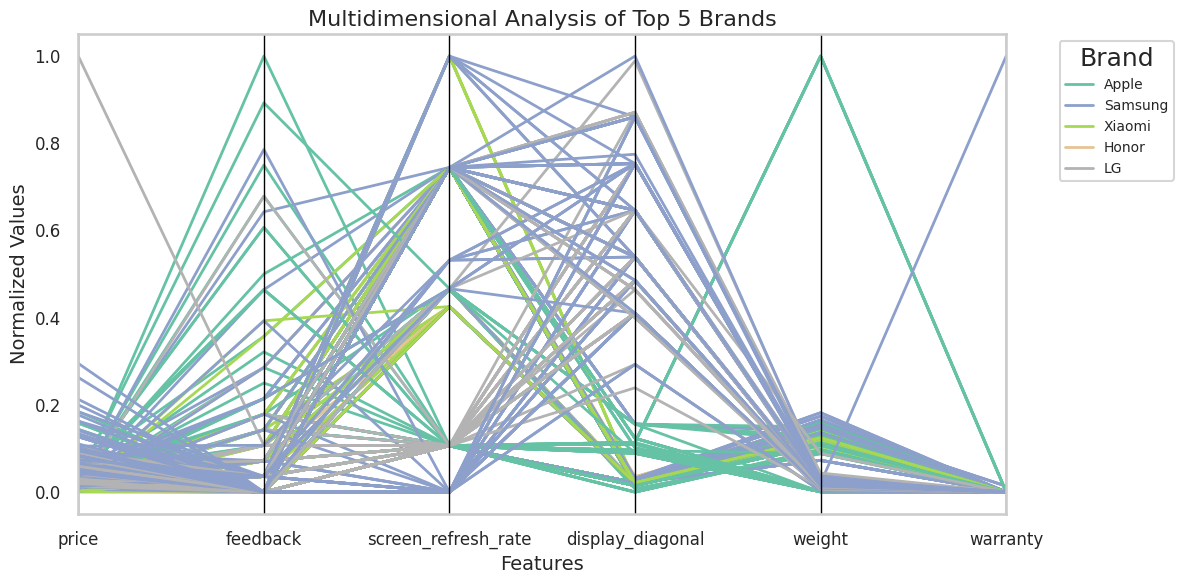

In [ ]:
from pandas.plotting import parallel_coordinates

top_brands = df['brand'].value_counts().index[:5]
df_top_brands = df[df['brand'].isin(top_brands)]

numeric_features = ['price', 'feedback', 'screen_refresh_rate',
                    'display_diagonal', 'weight', 'warranty']

df_top_brands_normalized = df_top_brands[numeric_features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_parallel = pd.concat([df_top_brands_normalized, df_top_brands['brand']], axis=1)

plt.figure(figsize=(12, 6))
parallel_coordinates(
    df_parallel,
    class_column='brand',
    colormap='Set2'
)
plt.title("Multidimensional Analysis of Top 5 Brands", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


# Sankey Diagram

In [ ]:
import plotly.graph_objects as go

top_brands_per_type = (
    df
    .groupby(['type', 'brand'])
    .size()
    .reset_index(name='count')
    .sort_values(['type', 'count'], ascending=[True, False])
)
top_brands_per_type = top_brands_per_type.groupby('type').head(5)

df_top5 = pd.merge(
    df,
    top_brands_per_type[['type', 'brand']],
    on=['type', 'brand'],
    how='inner'
)

types = df_top5['type'].unique().tolist()
brands = df_top5['brand'].unique().tolist()
all_nodes = types + brands

node_dict = {node: idx for idx, node in enumerate(all_nodes)}

df_links = df_top5.groupby(['type', 'brand']).size().reset_index(name='count')
source = df_links['type'].map(node_dict)
target = df_links['brand'].map(node_dict)
value = df_links['count']

type_palette = sns.color_palette("Set2", n_colors=len(types))
brand_palette = sns.color_palette("Set3", n_colors=len(brands))
all_node_colors = type_palette + brand_palette

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=["rgb"+str(tuple(int(c*255) for c in color)) for color in all_node_colors],
        customdata=all_nodes,
        hovertemplate='Node: %{customdata}<extra></extra>'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(63, 81, 181, 0.4)",
        hovertemplate='Type: %{source.label}<br>Brand: %{target.label}<br>Count: %{value}<extra></extra>'
    )
)])

fig.update_layout(
    title_text="Sankey Diagram: Distribution of Products by Types and Brands",
    font_size=14,
    height=600,
    margin=dict(l=50, r=50, t=100, b=50)
)

fig.show()


# Stacked Bar Plot

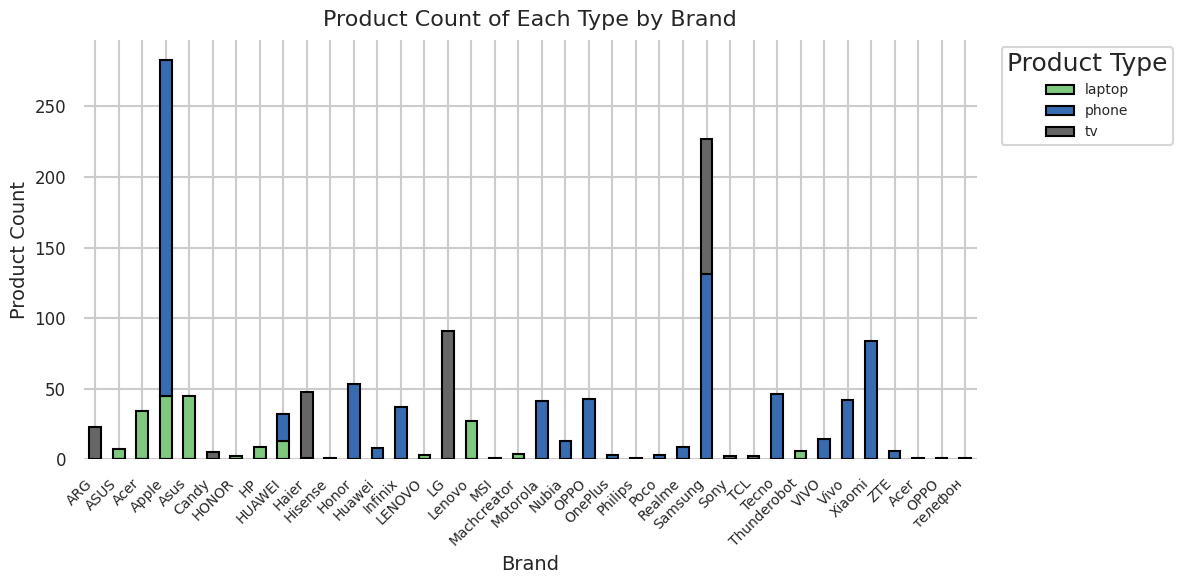

In [ ]:
import squarify

count_data = df.groupby(['brand', 'type']).size().unstack(fill_value=0)

count_data.plot(
    kind='bar',
    stacked=True,
    colormap='Accent',
    figsize=(12, 6),
    edgecolor='black'
)
plt.title("Product Count of Each Type by Brand", fontsize=16, pad=10)
plt.xlabel("Brand", fontsize=14)
plt.ylabel("Product Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Product Type', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
